# RFM Model and Customer Segmentation Task 

## Using Data Analytics and Machine Learning



In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# RFM Model:

### RFM framework is a method used to determine customer value by looking at the following three dimensions:

- Recency: when is the last time the user takes an action (e.g., login, place an order)? 
- Frequency: how many times does the user take this action?
- Monetary value: what is the sum of monetary value from this user throughout his/her lifetime?

When used properly, RFM becomes a powerful tool to identify the most valuable customer (MVC) of a business. Based on the output from this model, we are able to develop customized CRM strategies for different customer segments

In [2]:
# Loading the dataset
data = pd.read_excel('sales_data.xlsx')
print("Dataset loaded successfully!")

Dataset loaded successfully!


## About data

In [3]:
# first ten records
data.head(10)

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50
5,153,49,5841.24,119.21,96.84,1.98,2015-07-26,2021-10-24,46.57,1,...,1595.97,1447.96,0,20,23,6,0.00,2482.33,2759.43,599.48
6,187,43,5470.27,127.22,128.77,2.99,2019-01-14,2021-10-24,23.58,1,...,2042.31,2699.47,2,0,19,22,47.00,0.00,2578.28,2844.99
7,219,54,5200.53,96.31,237.53,4.40,2019-11-19,2021-10-24,13.06,1,...,754.72,1339.16,2,22,24,6,273.18,2328.21,1980.99,618.15
8,258,19,4967.06,261.42,51.91,2.73,2021-03-03,2021-10-24,12.37,1,...,2588.19,563.74,1,0,8,10,332.19,0.00,1673.10,2961.77
9,308,21,4726.38,225.07,63.88,3.04,2020-01-06,2021-10-24,31.29,1,...,1094.98,991.97,4,11,6,0,1095.98,1867.94,1762.46,0.00


In [4]:
# Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

- We can cleary see thet there is no missing values in the dataset and the datetime format is also ideal.

## Lets calculate RFM

1. Recency

Here we are calculating recency for customers who had made a purchase with a company.

In [5]:
df_recency = data.groupby(by='CustomerID',
                          as_index=False)['LATEST_ORDER_DATE'].max()

df_recency.columns = ['CustomerID', 'LAST_PURCHASE_DATE']
recent_date = df_recency['LAST_PURCHASE_DATE'].max()
df_recency['Recency'] = df_recency['LAST_PURCHASE_DATE'].apply(
    lambda x: (recent_date -x).days)

In [6]:
df_recency.head()

,CustomerID,LAST_PURCHASE_DATE,Recency
0,1,2021-09-02,52
1,2,2021-07-23,93
2,3,2021-09-02,52
3,4,2021-10-20,4
4,5,2021-06-17,129


2. Calculating Frequency

We are here calculating the frequency of frequent transactions of the customer in ordering/buying some product from the company.

In [7]:
df_freq = data.groupby(by=['CustomerID'], 
                                         as_index=False)['LATEST_ORDER_DATE'].count()

df_freq.columns = ['CustomerID', 'Frequency']
df_freq.head()

,CustomerID,Frequency
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


3. Monetary Value

Here we are calculating the monetary value of customer spend on purchasing products from the company.

In [8]:
data['Total'] = data['REVENUE']*data['TOTAL_ORDERS']
monetary_df = data.groupby(by='CustomerID',as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,1,2125691.40
1,2,1916731.82
2,3,1281485.41
3,4,1558577.16
4,5,439009.74


### Ranking Customer's based upon their recency, frequency, and monetary

Here we are normalizing the rank of the customers with in a compnay to analyze the ranking.

In [9]:
rf_df = df_recency.merge(df_freq, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(
    columns='LAST_PURCHASE_DATE')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,1,52,1,2125691.40
1,2,93,1,1916731.82
2,3,52,1,1281485.41
3,4,4,1,1558577.16
4,5,129,1,439009.74


In [10]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['M_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)

rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1,52,1,2125691.40,60.818192,100.0,100.00
1,2,93,1,1916731.82,47.207669,100.0,99.98
2,3,52,1,1281485.41,60.818192,100.0,99.86
3,4,4,1,1558577.16,85.319362,100.0,99.94
4,5,129,1,439009.74,35.949170,100.0,99.24


# Calculating RFM Score

**RFM** score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating 

### **RFM score is**:

### 0.15 x Recency + 0.28 x Frequency Score + 0.57 x Monetary Score

In [11]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28*\
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,1,4.71
1,2,4.60
2,3,4.70
3,4,4.89
4,5,4.50
5,6,4.76
6,7,4.55


Let's sort the dataframe

In [12]:
rfm_df.sort_values(by='RFM_Score').head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
4950,171811,206,1,119.99,11.17,100.0,0.36,1.49
4947,171344,206,1,119.99,11.17,100.0,0.36,1.49
4969,174038,206,1,117.49,11.17,100.0,0.14,1.49
4968,174004,206,1,117.49,11.17,100.0,0.14,1.49
4967,173987,206,1,117.49,11.17,100.0,0.14,1.49


### Lets see some statistical analysis using of the RFM model

In [13]:
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
count,5000.000000,5000.000000,5000.0,5.000000e+03,5000.000000,5000.0,5000.000000,5000.000000
mean,40709.227800,86.420000,1.0,4.120208e+04,55.746266,100.0,50.010000,3.243370
std,49949.848017,80.156513,0.0,1.019016e+05,31.910449,0.0,28.870399,0.903305
min,1.000000,0.000000,1.0,9.188000e+01,11.170000,100.0,0.020000,1.490000
25%,1687.500000,6.000000,1.0,9.419550e+02,27.940000,100.0,25.015000,2.530000
50%,13765.000000,67.000000,1.0,8.227650e+03,55.750000,100.0,50.010000,3.310000
75%,71891.500000,170.250000,1.0,4.754047e+04,83.360000,100.0,75.005000,4.000000
max,277160.000000,206.000000,1.0,2.125691e+06,100.000000,100.0,100.000000,5.000000


- From above table we can see the statistical information about RFM model

## Rating Customer based on the RFM Score - Customer Segmentation

*Dividing customer segments based on RFM score.*

- rfm score >4.5 : Top Customer
- 4.5 > rfm score > 4 : High Value Customer
- 4 > rfm score > 3 : Medium value customer
- 3 > rfm score > 1.6 : Low-value customer
- rfm score < 1.6 :Lost Customer

In [14]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,1,4.71,Top Customers
1,2,4.60,Top Customers
2,3,4.70,Top Customers
3,4,4.89,Top Customers
4,5,4.50,High value Customer
5,6,4.76,Top Customers
6,7,4.55,Top Customers
7,8,4.64,Top Customers
8,9,4.56,Top Customers
9,10,4.83,Top Customers


In [15]:
rfm_df['Customer_segment'].value_counts(ascending=False)

Low Value Customers      1812
Medium Value Customer    1775
High value Customer       860
Top Customers             373
Lost Customers            180
Name: Customer_segment, dtype: int64

#  Visualizing the customer segments

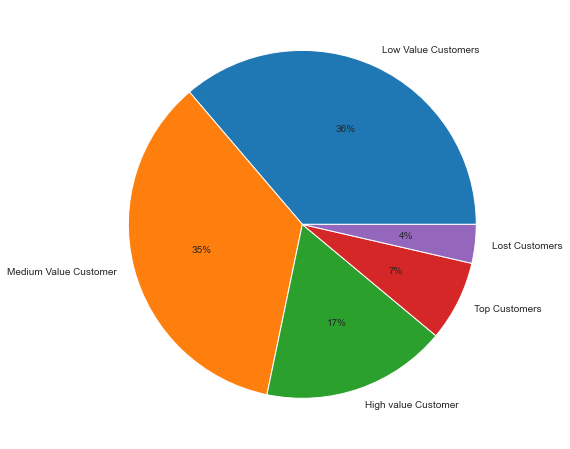

In [16]:
plt.subplots(figsize=(10, 8))
plt.pie(rfm_df.Customer_segment.value_counts(),
       labels = rfm_df.Customer_segment.value_counts().index,
       autopct='%.0f%%')
plt.show()

### - Above pie chart is defining that most of that:

1. Most of the customers are `Low Value Customer` following `Medium Value Customer` and `High Value Customer`
2. `Top Customer` are very less and `Lost Customer`are very small which is good sign.

## Our Main goal is to find the customer segment specifically into 3 groups:

## 1. Champions
## 2. Potential Customers
## 3. Need Attention


Lets convert our previous segment into above three:

- RFM_SCORE > 4 : Champions
- 4 > RFM_sCORE > 2: Potential Customers
- 2 > RFM_SCORE: Need Attention

In [17]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4, "Champions",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "Champions",
                                        (np.where(
    rfm_df['RFM_Score'] > 2,
                             "Potential Customers",
                             np.where(rfm_df['RFM_Score'] > 2,
                            'Need Attention', 'Need Attention'))))))
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,1,4.71,Champions
1,2,4.60,Champions
2,3,4.70,Champions
3,4,4.89,Champions
4,5,4.50,Champions
5,6,4.76,Champions
6,7,4.55,Champions
7,8,4.64,Champions
8,9,4.56,Champions
9,10,4.83,Champions


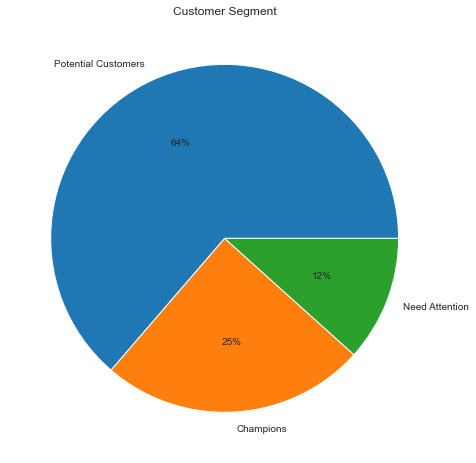

In [18]:
plt.subplots(figsize=(10, 8))
plt.pie(rfm_df.Customer_segment.value_counts(),
       labels = rfm_df.Customer_segment.value_counts().index,
       autopct='%.0f%%')
plt.title("Customer Segment")
plt.show()

### - As expected from previous pie chart, we have very high number of `Potential Customer`.
### - Only 25% customers are Champions

# Exploratory Data Analysis

In [19]:
data.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Total
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44,1486330.96
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55,904128.72
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80,312166.67
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23,307659.88
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50,344489.20


## Univariate Analysis

---------

Univariate Analysis will help us to analyze single entity, as most of the columns are continous in nature so there are chanches of outliers which can disturb our analysis. So let's find out with some important and fundamentals columns such as:

`TOTAL_ORDERS, REVENUE, AVERAGE_ORDER_VALUE, CARRIAGE_REVENUE, AVERAGESHIPPING`


### TOTAL ORDERS

In [20]:
# Lets exlore total orders placed by customers(highest) top 10
data['TOTAL_ORDERS'].value_counts(ascending=False).head(10)

2     560
3     509
1     366
4     360
5     238
6     206
19    153
7     149
18    148
21    139
Name: TOTAL_ORDERS, dtype: int64

In [21]:
data['TOTAL_ORDERS'].describe()

count    5000.00000
mean       12.87040
std        12.67988
min         1.00000
25%         3.00000
50%         8.00000
75%        20.00000
max       156.00000
Name: TOTAL_ORDERS, dtype: float64

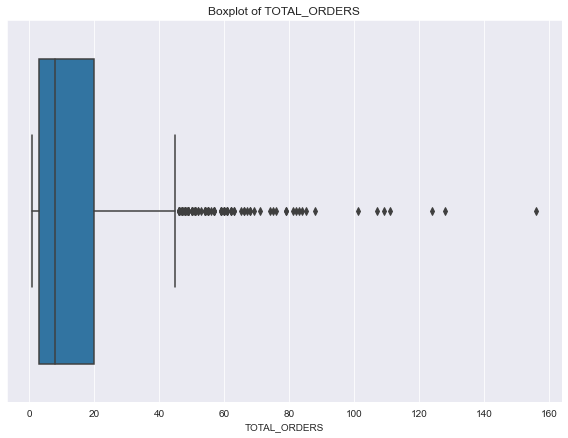

In [22]:
# boxplot of orders to find some impactful insights
plt.figure(figsize=(8,6))
sns.boxplot(data['TOTAL_ORDERS'])
plt.tight_layout()
plt.title("Boxplot of TOTAL_ORDERS")
plt.show()

### - In `TOTAL_ORDERS` there are some points those are extreme(outlier). If we ignored outliers then there are Maximum `84` TOTAL_ORDERS (ideally). 

### - That means, most of our customers are has `TOTAL ORDERS` under 84. Where some exceptional customers are ordering more than 100 orders.

### REVENUE

In [23]:
# Avg of REVENUE generated(without detecting outliers as we know avg/mean is affected by outliers)
data['REVENUE'].mean()

1681.5238400000312

In [24]:
# statistical analysis
data['REVENUE'].describe()

count     5000.000000
mean      1681.523840
std       1998.618678
min         38.500000
25%        315.097500
50%        966.725000
75%       2493.072500
max      34847.400000
Name: REVENUE, dtype: float64

- It's look like, `REVENUE` has some outliers. See the difference between 25th-50th percentile and 50th-75th percentile.

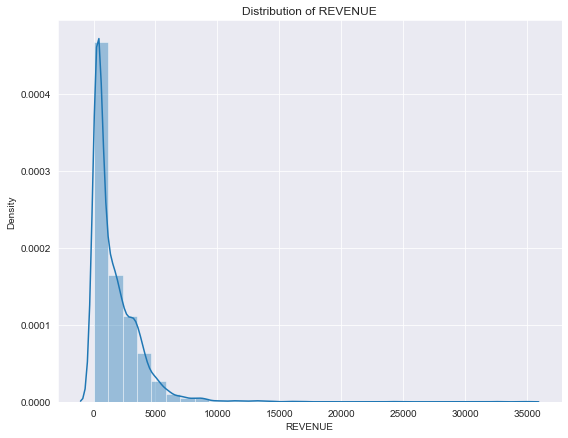

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(data['REVENUE'],bins=30)
plt.tight_layout()
plt.title("Distribution of REVENUE")
plt.show()

- Distribution of `REVENUE` is right skewed that means most data falls to the right, or positive side, of the graph's peak. 

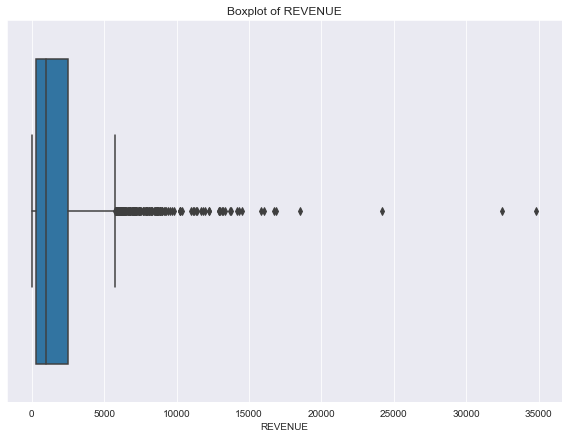

In [26]:
# Lets plot the box plot so we can detect outliers if present
plt.figure(figsize=(8,6))
sns.boxplot(data['REVENUE'])
plt.tight_layout()
plt.title("Boxplot of REVENUE")
plt.show()

- Okay, so boxplot is showing us some intresting visual i.e. the distribution is situated at one side only and tail(right side) contains data points those closely situated until 18,000.

- Only 3 data points have REVENUE value more than 23,000.

### - Maximum REVENUE generated (if we avoid outlier) is between 15,000 - 18,000

### Average Order Value

- Average Order Value (AOC) can be defiend as: revenue/number_of_orders

It means on an average, a customer spends x amount for each purchase.

In [27]:
# Average order value
data['AVERAGE_ORDER_VALUE'].describe()

count    5000.000000
mean      136.537378
std        91.651569
min        10.680000
25%        83.025000
50%       113.160000
75%       160.272500
max      1578.880000
Name: AVERAGE_ORDER_VALUE, dtype: float64

### - Average of `AVERAGE_ORDER_VALUE` is 136.54, that means our customers are on an average spending `136.54` while purchasing from us.

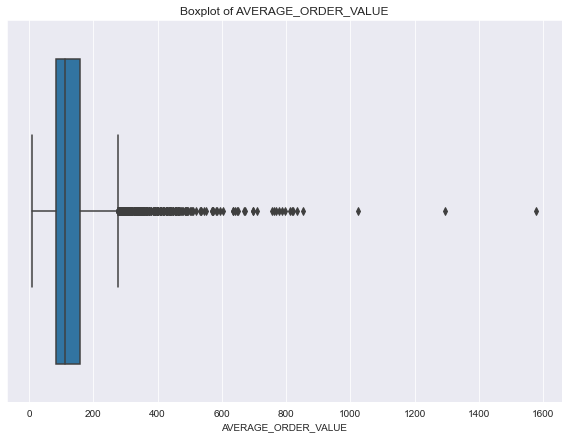

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(data['AVERAGE_ORDER_VALUE'])
plt.tight_layout()
plt.title("Boxplot of AVERAGE_ORDER_VALUE")
plt.show()

###  - Upper limit of `AVERAGE_ORDER_VALUE` is 700 (outliers avoided)

## Carriage Revenue

In [29]:
data['CARRIAGE_REVENUE'].describe()

count    5000.000000
mean       46.036376
std        47.879226
min         0.000000
25%         9.980000
50%        24.985000
75%        76.862500
max       529.590000
Name: CARRIAGE_REVENUE, dtype: float64

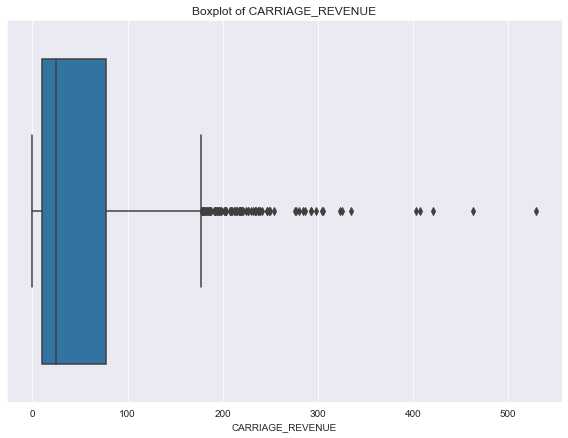

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(data['CARRIAGE_REVENUE'])
plt.tight_layout()
plt.title("Boxplot of CARRIAGE_REVENUE")
plt.show()

### - `CARRIAGE_REVENUE` is ideally less than 350. Where in some cases it goes upto more than 400.

## AVERAGESHIPPING

In [31]:
# followring the same step to find appropriate results
data['AVERAGESHIPPING'].describe()

count    5000.000000
mean        3.592574
std         2.021360
min         0.000000
25%         2.500000
50%         3.660000
75%         4.790000
max        35.990000
Name: AVERAGESHIPPING, dtype: float64

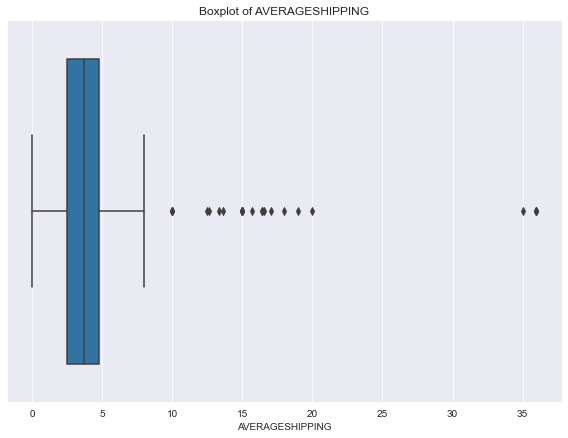

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(data['AVERAGESHIPPING'])
plt.tight_layout()
plt.title("Boxplot of AVERAGESHIPPING")
plt.show()

### - In case of `AVERAGESHIPPING` ideally upto 20 and in very rare case it goes more than 20.

## TOTAL

In [33]:
data['Total'].describe()

count    5.000000e+03
mean     4.120208e+04
std      1.019016e+05
min      9.188000e+01
25%      9.419550e+02
50%      8.227650e+03
75%      4.754047e+04
max      2.125691e+06
Name: Total, dtype: float64

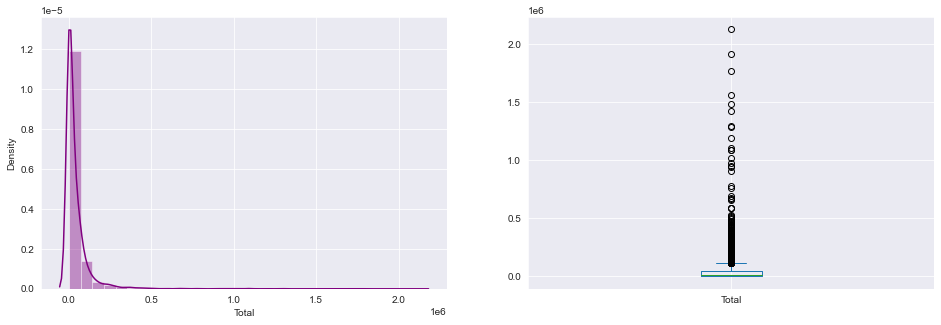

In [34]:
# plotting the distribution of `Total

plt.figure(1)
plt.subplot(121)
# For better working it is necessary to drop null values
# df = data.dropna()
sns.distplot(data['Total'],bins=30,color='purple')
plt.subplot(122)
data['Total'].plot.box(figsize=(16,5))
plt.show()

## Bivariate Analysis

---
For working on bivariate analysis we should merge RFM_Score and Customer_segmentation column from RFM dataFrame and fundamental colunms from our original data.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

In [36]:
# dropping unecessary columns
df = data.copy()

In [37]:
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Total
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44,1486330.96
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55,904128.72
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80,312166.67
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23,307659.88
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50,344489.20


In [38]:
df.drop(df.iloc[:,3:40],inplace=True,axis=1)

In [39]:
df.head()

,CustomerID,TOTAL_ORDERS,REVENUE,Total
0,22,124,11986.54,1486330.96
1,29,82,11025.96,904128.72
2,83,43,7259.69,312166.67
3,95,44,6992.27,307659.88
4,124,55,6263.44,344489.20


In [40]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,1,52,1,2125691.40,60.82,100.0,100.00,4.71,Champions
1,2,93,1,1916731.82,47.21,100.0,99.98,4.60,Champions
2,3,52,1,1281485.41,60.82,100.0,99.86,4.70,Champions
3,4,4,1,1558577.16,85.32,100.0,99.94,4.89,Champions
4,5,129,1,439009.74,35.95,100.0,99.24,4.50,Champions


In [41]:
# df2 = pd.merge(df,rfm_df)
df2 = df.merge(rfm_df,on='CustomerID')

In [42]:
df2.head()

,CustomerID,TOTAL_ORDERS,REVENUE,Total,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,22,124,11986.54,1486330.96,0,1,1486330.96,100.0,100.0,99.92,5.00,Champions
1,29,82,11025.96,904128.72,0,1,904128.72,100.0,100.0,99.68,4.99,Champions
2,83,43,7259.69,312166.67,0,1,312166.67,100.0,100.0,98.46,4.96,Champions
3,95,44,6992.27,307659.88,0,1,307659.88,100.0,100.0,98.40,4.95,Champions
4,124,55,6263.44,344489.20,0,1,344489.20,100.0,100.0,98.64,4.96,Champions


## Bivariate Analysis on Customer Segment

### Customer Segment vs REVENUE

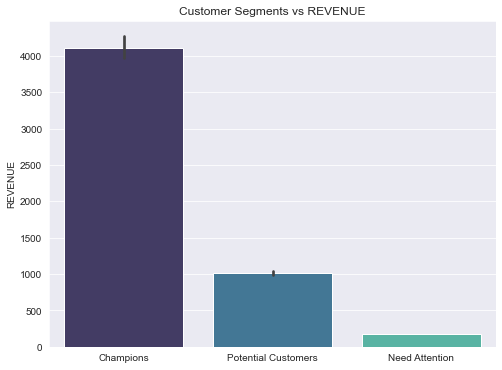

In [43]:
plt.figure(figsize=(8,6))
ax = sns.barplot(y = "REVENUE", x = "Customer_segment", data = df2.sort_values("REVENUE", ascending = False), palette="mako")
plt.title('Customer Segments vs REVENUE')
ax.set(xlabel=None)
plt.show()

### -` Champions` are generating our `REVENUE` more than others
### - `Potential Customers` has generating very much less `REVENUE` as they have largest contribution in RFM model.

### Customer Segment vs TOTAL ORDERS

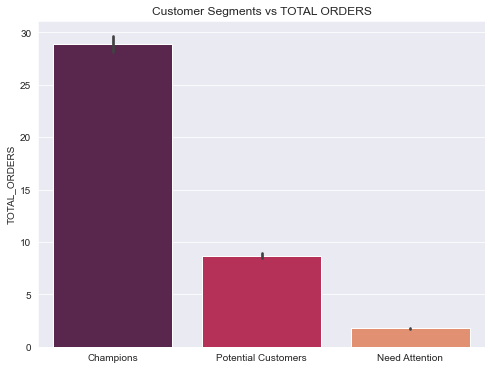

In [44]:
plt.figure(figsize=(8,6))
ax = sns.barplot(y = "TOTAL_ORDERS", x = "Customer_segment", data = df2.sort_values("REVENUE", ascending = False), palette="rocket")
plt.title('Customer Segments vs TOTAL ORDERS')
ax.set(xlabel=None)
plt.show()

### - Same pattern like previous graph. `Champions` are ordering most from our side and it is very high than runner up `Potential Customers`.

### Customer Segment vs TOTAL

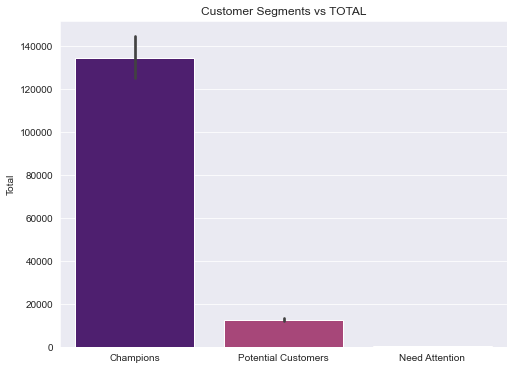

In [45]:
plt.figure(figsize=(8,6))
ax = sns.barplot(y = "Total", x = "Customer_segment", data = df2.sort_values("Total", ascending = False), palette="magma")
plt.title('Customer Segments vs TOTAL')
ax.set(xlabel=None)
plt.show()

### - `Champions` has very huge amount of `Total`, more than 15,000. Whereas `Potential Customers` has very very less amount of `Total`not even more than 2,000.

In [46]:
# Merging RFM table to original one
df3 = data.merge(rfm_df,on='CustomerID')

In [47]:
df3

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,TIME_1801_2359_REVENUE,Total,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,1327.44,1486330.96,0,1,1486330.96,100.00,100.0,99.92,5.00,Champions
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,5646.55,904128.72,0,1,904128.72,100.00,100.0,99.68,4.99,Champions
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,3990.80,312166.67,0,1,312166.67,100.00,100.0,98.46,4.96,Champions
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,3058.23,307659.88,0,1,307659.88,100.00,100.0,98.40,4.95,Champions
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,1559.50,344489.20,0,1,344489.20,100.00,100.0,98.64,4.96,Champions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,117.49,117.49,206,1,117.49,11.17,100.0,0.14,1.49,Need Attention
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,117.49,117.49,206,1,117.49,11.17,100.0,0.14,1.49,Need Attention
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,117.49,117.49,206,1,117.49,11.17,100.0,0.14,1.49,Need Attention
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,117.49,206,1,117.49,11.17,100.0,0.14,1.49,Need Attention


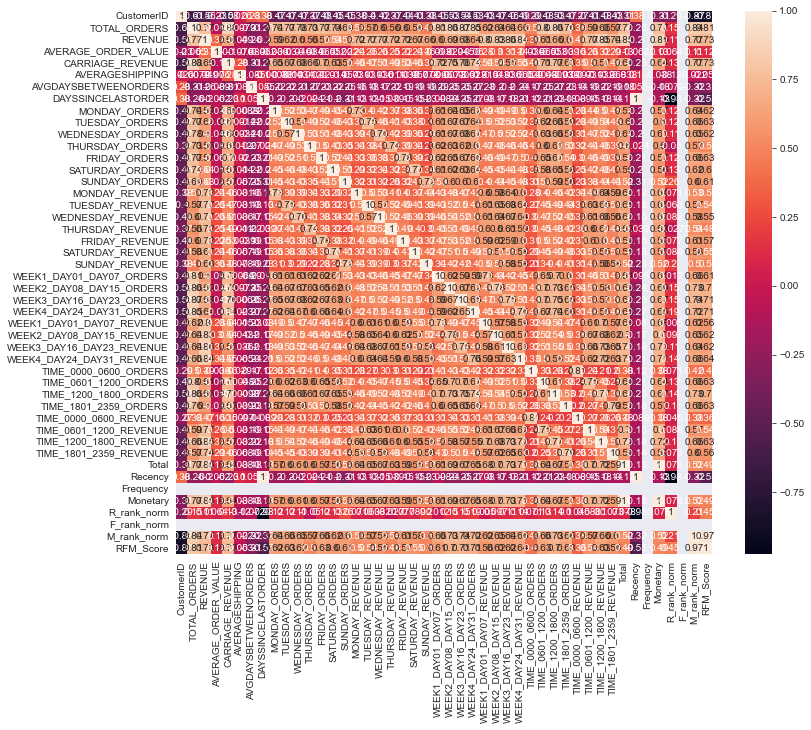

In [48]:
plt.figure(figsize=(12,10))
sns.heatmap(df3.corr(), annot=True)
plt.show()

###  - Removing uncessary columns

In [49]:
df3.drop(['Frequency','F_rank_norm', 'CustomerID', 'FIRST_ORDER_DATE','LATEST_ORDER_DATE', 'AVGDAYSBETWEENORDERS','DAYSSINCELASTORDER','Recency','Monetary','R_rank_norm','M_rank_norm','M_rank_norm', 'AVERAGESHIPPING','AVERAGE_ORDER_VALUE'],inplace=True, axis=1)
df3.head()

,TOTAL_ORDERS,REVENUE,CARRIAGE_REVENUE,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,...,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Total,RFM_Score,Customer_segment
0,124,11986.54,529.59,13,13,29,25,19,15,10,...,61,37,14,1067.92,5674.65,3916.53,1327.44,1486330.96,5.00,Champions
1,82,11025.96,97.92,11,13,10,13,14,10,11,...,13,24,44,30.25,3143.69,2205.47,5646.55,904128.72,4.99,Champions
2,43,7259.69,171.69,5,4,3,5,5,8,13,...,6,12,25,0.00,707.98,2560.91,3990.80,312166.67,4.96,Champions
3,44,6992.27,92.82,10,8,5,8,5,3,5,...,10,13,21,0.00,1908.99,2025.05,3058.23,307659.88,4.95,Champions
4,55,6263.44,179.04,2,3,8,8,12,10,12,...,9,27,13,501.34,1197.83,3004.77,1559.50,344489.20,4.96,Champions


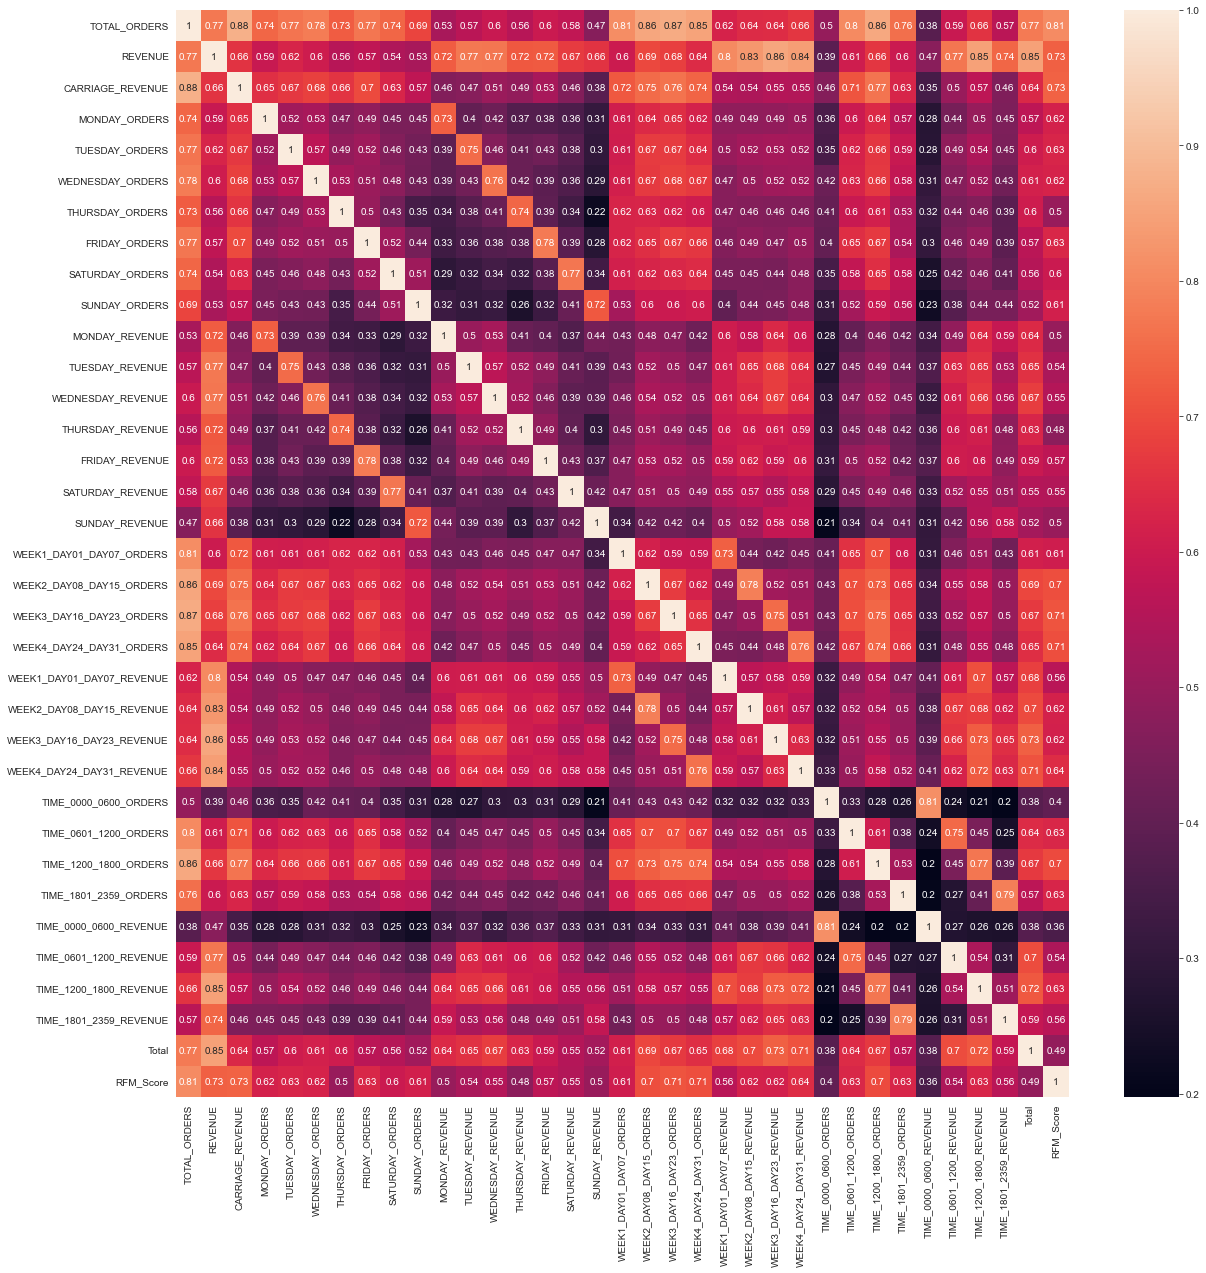

In [50]:
plt.figure(figsize=(20,20))
sns.heatmap(df3.corr(), annot=True)
plt.show()

In [51]:
df3.columns

Index(['TOTAL_ORDERS', 'REVENUE', 'CARRIAGE_REVENUE', 'MONDAY_ORDERS',
       'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS', 'THURSDAY_ORDERS',
       'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS', 'MONDAY_REVENUE',
       'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE', 'THURSDAY_REVENUE',
       'FRIDAY_REVENUE', 'SATURDAY_REVENUE', 'SUNDAY_REVENUE',
       'WEEK1_DAY01_DAY07_ORDERS', 'WEEK2_DAY08_DAY15_ORDERS',
       'WEEK3_DAY16_DAY23_ORDERS', 'WEEK4_DAY24_DAY31_ORDERS',
       'WEEK1_DAY01_DAY07_REVENUE', 'WEEK2_DAY08_DAY15_REVENUE',
       'WEEK3_DAY16_DAY23_REVENUE', 'WEEK4_DAY24_DAY31_REVENUE',
       'TIME_0000_0600_ORDERS', 'TIME_0601_1200_ORDERS',
       'TIME_1200_1800_ORDERS', 'TIME_1801_2359_ORDERS',
       'TIME_0000_0600_REVENUE', 'TIME_0601_1200_REVENUE',
       'TIME_1200_1800_REVENUE', 'TIME_1801_2359_REVENUE', 'Total',
       'RFM_Score', 'Customer_segment'],
      dtype='object')

In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TOTAL_ORDERS               5000 non-null   int64  
 1   REVENUE                    5000 non-null   float64
 2   CARRIAGE_REVENUE           5000 non-null   float64
 3   MONDAY_ORDERS              5000 non-null   int64  
 4   TUESDAY_ORDERS             5000 non-null   int64  
 5   WEDNESDAY_ORDERS           5000 non-null   int64  
 6   THURSDAY_ORDERS            5000 non-null   int64  
 7   FRIDAY_ORDERS              5000 non-null   int64  
 8   SATURDAY_ORDERS            5000 non-null   int64  
 9   SUNDAY_ORDERS              5000 non-null   int64  
 10  MONDAY_REVENUE             5000 non-null   float64
 11  TUESDAY_REVENUE            5000 non-null   float64
 12  WEDNESDAY_REVENUE          5000 non-null   float64
 13  THURSDAY_REVENUE           5000 non-null   float

# Predictive Modeling

We are building Machine Learning model based on `Customer_segment`. Here goal is to predict that which customers comes under which category. We've already merged the RFM data into main data on basis of `CustomerID`.

## Data-Preprocessing

#### Data Standardization

In [53]:
# Encoding the target variable

df3['Customer_segment'].value_counts()

Potential Customers    3184
Champions              1233
Need Attention          583
Name: Customer_segment, dtype: int64

In [54]:
# replacing values
df3['Customer_segment'].replace(['Champions', 'Potential Customers', 'Need Attention'],
                        [0, 1,2], inplace=True)

df3['Customer_segment'].value_counts()

1    3184
0    1233
2     583
Name: Customer_segment, dtype: int64

In [55]:
df3.head()

,TOTAL_ORDERS,REVENUE,CARRIAGE_REVENUE,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,...,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Total,RFM_Score,Customer_segment
0,124,11986.54,529.59,13,13,29,25,19,15,10,...,61,37,14,1067.92,5674.65,3916.53,1327.44,1486330.96,5.00,0
1,82,11025.96,97.92,11,13,10,13,14,10,11,...,13,24,44,30.25,3143.69,2205.47,5646.55,904128.72,4.99,0
2,43,7259.69,171.69,5,4,3,5,5,8,13,...,6,12,25,0.00,707.98,2560.91,3990.80,312166.67,4.96,0
3,44,6992.27,92.82,10,8,5,8,5,3,5,...,10,13,21,0.00,1908.99,2025.05,3058.23,307659.88,4.95,0
4,55,6263.44,179.04,2,3,8,8,12,10,12,...,9,27,13,501.34,1197.83,3004.77,1559.50,344489.20,4.96,0


## Dealing the Outliers

- Removing outliers based on `Interquartile range`

In [56]:
df3.columns

Index(['TOTAL_ORDERS', 'REVENUE', 'CARRIAGE_REVENUE', 'MONDAY_ORDERS',
       'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS', 'THURSDAY_ORDERS',
       'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS', 'MONDAY_REVENUE',
       'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE', 'THURSDAY_REVENUE',
       'FRIDAY_REVENUE', 'SATURDAY_REVENUE', 'SUNDAY_REVENUE',
       'WEEK1_DAY01_DAY07_ORDERS', 'WEEK2_DAY08_DAY15_ORDERS',
       'WEEK3_DAY16_DAY23_ORDERS', 'WEEK4_DAY24_DAY31_ORDERS',
       'WEEK1_DAY01_DAY07_REVENUE', 'WEEK2_DAY08_DAY15_REVENUE',
       'WEEK3_DAY16_DAY23_REVENUE', 'WEEK4_DAY24_DAY31_REVENUE',
       'TIME_0000_0600_ORDERS', 'TIME_0601_1200_ORDERS',
       'TIME_1200_1800_ORDERS', 'TIME_1801_2359_ORDERS',
       'TIME_0000_0600_REVENUE', 'TIME_0601_1200_REVENUE',
       'TIME_1200_1800_REVENUE', 'TIME_1801_2359_REVENUE', 'Total',
       'RFM_Score', 'Customer_segment'],
      dtype='object')

In [57]:
## All columns are continous
cols = ['TOTAL_ORDERS', 'REVENUE', 'CARRIAGE_REVENUE', 'MONDAY_ORDERS',
       'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS', 'THURSDAY_ORDERS',
       'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS', 'MONDAY_REVENUE',
       'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE', 'THURSDAY_REVENUE',
       'FRIDAY_REVENUE', 'SATURDAY_REVENUE', 'SUNDAY_REVENUE',
       'WEEK1_DAY01_DAY07_ORDERS', 'WEEK2_DAY08_DAY15_ORDERS',
       'WEEK3_DAY16_DAY23_ORDERS', 'WEEK4_DAY24_DAY31_ORDERS',
       'WEEK1_DAY01_DAY07_REVENUE', 'WEEK2_DAY08_DAY15_REVENUE',
       'WEEK3_DAY16_DAY23_REVENUE', 'WEEK4_DAY24_DAY31_REVENUE',
       'TIME_0000_0600_ORDERS', 'TIME_0601_1200_ORDERS',
       'TIME_1200_1800_ORDERS', 'TIME_1801_2359_ORDERS',
       'TIME_0000_0600_REVENUE', 'TIME_0601_1200_REVENUE',
       'TIME_1200_1800_REVENUE', 'TIME_1801_2359_REVENUE', 'Total'] # one or more

Q1 = df3[cols].quantile(0.25)
Q3 = df3[cols].quantile(0.75)

In [58]:
IQR = Q3 - Q1
print(IQR)

TOTAL_ORDERS                    17.0000
REVENUE                       2177.9750
CARRIAGE_REVENUE                66.8825
MONDAY_ORDERS                    2.0000
TUESDAY_ORDERS                   3.0000
WEDNESDAY_ORDERS                 3.0000
THURSDAY_ORDERS                  3.0000
FRIDAY_ORDERS                    3.0000
SATURDAY_ORDERS                  3.0000
SUNDAY_ORDERS                    3.0000
MONDAY_REVENUE                 286.8650
TUESDAY_REVENUE                310.9725
WEDNESDAY_REVENUE              319.9925
THURSDAY_REVENUE               344.3575
FRIDAY_REVENUE                 352.7400
SATURDAY_REVENUE               297.2800
SUNDAY_REVENUE                 341.3675
WEEK1_DAY01_DAY07_ORDERS         3.0000
WEEK2_DAY08_DAY15_ORDERS         5.0000
WEEK3_DAY16_DAY23_ORDERS         5.0000
WEEK4_DAY24_DAY31_ORDERS         4.0000
WEEK1_DAY01_DAY07_REVENUE      449.0225
WEEK2_DAY08_DAY15_REVENUE      553.4625
WEEK3_DAY16_DAY23_REVENUE      604.0850
WEEK4_DAY24_DAY31_REVENUE      571.4875


In [59]:
df3 = df3[~((df3[cols] < (Q1 - 1.5 * IQR)) |(df3[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df3.head()

,TOTAL_ORDERS,REVENUE,CARRIAGE_REVENUE,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,...,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,Total,RFM_Score,Customer_segment
31,31,2659.31,102.81,4,3,2,5,5,7,5,...,7,14,9,98.74,519.46,1246.66,794.45,82438.61,4.64,0
33,19,2609.00,78.85,1,5,1,3,3,3,3,...,4,12,3,0.00,514.93,1639.10,454.97,49571.00,4.31,0
38,21,2530.55,54.85,4,2,4,3,5,1,2,...,6,12,3,0.00,639.57,1508.89,382.09,53141.55,4.36,0
49,25,2234.03,89.84,5,5,3,3,1,1,7,...,5,8,11,72.99,525.95,927.75,707.34,55850.75,4.39,0
57,17,1957.14,91.84,5,3,2,5,0,0,2,...,5,5,5,262.08,308.66,637.25,749.15,33271.38,4.04,0


## Data-Preprocessing

In [60]:
# Splitting the data
from sklearn.model_selection import train_test_split

X = df3.iloc[:,:-1].values
y = df3.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2333, 35) (778, 35) (2333,) (778,)


In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
X_train

array([[-0.23037261, -0.59715904, -0.47939567, ..., -0.78670487,
        -0.46022993, -0.51387888],
       [-0.91722157, -0.85792833, -0.65679075, ..., -0.78670487,
        -0.56776595, -1.74042043],
       [-0.40208485, -0.62239641, -0.47939567, ..., -0.78670487,
        -0.48882085, -0.65817789],
       ...,
       [ 0.2847641 ,  1.29613129, -0.30200059, ...,  1.84301384,
         0.3341171 ,  1.01569058],
       [ 1.83017426,  1.15359065,  1.86229044, ...,  0.37707958,
         1.24580032,  1.18884939],
       [-0.91722157, -0.75906516, -0.86973594, ...,  0.06180388,
        -0.56304658, -0.65817789]])

# Multi-classification with Machine Learning models

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### KNN

In [65]:
# as we already know that we have 3 classes, so K value will be 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Using K-Fold cross validation

In [66]:
from sklearn.model_selection import cross_val_score

knn_score = cross_val_score(knn, X_train, y_train, cv=5)
print("KNN score:")
print(round(knn_score.mean(),2)*100)

KNN score:
93.0


### Evaluating KNN (Confusion Matrix)

In [67]:
from sklearn.metrics import confusion_matrix
knn_predictions = knn.predict(X_test)

cm = confusion_matrix(y_test, knn_predictions)
print(cm)

[[  5   7   0]
 [  1 581  36]
 [  0   4 144]]


## Naive Bayes (GaussianNB)

In [68]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

### Cross Validation

In [69]:
gnb_score = cross_val_score(gnb, X_train, y_train, cv=5)
print("GaussianNB score:")
print(round(gnb_score.mean(),2)*100)

GaussianNB score:
88.0


### Confusion Matrix

In [70]:
gnb_predictions = gnb.predict(X_test)
cm = confusion_matrix(y_test, gnb_predictions)
print(cm)

[[ 12   0   0]
 [ 64 509  45]
 [  0   2 146]]


## Imbalacing of the Data

- As we know that our target class imbalance

Using `SMOTE` technique

### Over-Sampling: SMOTE
- SMOTE(Synthetic Minority Oversampling technique) consists of synthesizing elements for the minority class, based on those that alreay exist. It works randmoly picking a point from the minorityy class and computing the k-nearest neighbors for this point. The synthetic points are added between chosen point and its neighbors. We'll use ratio='minority' to resample the minority class.

In [71]:
df3['Customer_segment'].value_counts()

1    2463
2     581
0      67
Name: Customer_segment, dtype: int64

In [72]:
X_train.shape, y_train.shape

((2333, 35), (2333,))

In [73]:
# Lets fix this using SMOTE technique
from imblearn.over_sampling import SMOTE
smote = SMOTE('minority')

X_sm, y_sm = smote.fit_sample(X_train, y_train)
print(X_sm.shape, y_sm.shape)

(4123, 35) (4123,)


## Fitting the models again after sampling

#### KNN

In [74]:
knn_sm = KNeighborsClassifier(n_neighbors=3)
knn_sm.fit(X_sm, y_sm)
knn_sm_score = cross_val_score(knn_sm, X_sm, y_sm, cv=5)
print("KNN score (After Sampling)")
print(round(knn_sm_score.mean(),2)*100)

KNN score (After Sampling)
95.0


#### Naive Bayes

In [75]:
gnb_sm = GaussianNB()
gnb_sm.fit(X_sm, y_sm)
gnb_sm_score = cross_val_score(gnb_sm, X_sm, y_sm, cv=5)
print("Naive Bayes(Gaussian NB) score (After Sampling)")
print(round(gnb_sm_score.mean(),2)*100)

Naive Bayes(Gaussian NB) score (After Sampling)
93.0


## Hyper parameter tunning

#### Using GridSearchCV

In [76]:
# KNN
from sklearn.model_selection import GridSearchCV

knn_params = {'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_knn = GridSearchCV(KNeighborsClassifier(),knn_params)
grid_knn.fit(X_sm, y_sm)
knn = grid_knn.best_params_
print(knn)

{'algorithm': 'auto', 'weights': 'distance'}


In [77]:
# GausianNB

gnb_params = {'var_smoothing': [1e-11, 1e-10, 1e-9]}
grid_gnb = GridSearchCV(GaussianNB(), gnb_params)
grid_gnb.fit(X_sm, y_sm)
gnb = grid_gnb.best_params_
print(gnb)

{'var_smoothing': 1e-11}


## Fitting model after tunning 

In [78]:
# KNN
knn_tuned = KNeighborsClassifier(n_neighbors=3, algorithm='auto',weights='distance')
knn_tuned.fit(X_sm,y_sm)
knn_tuned_score = cross_val_score(knn_tuned, X_sm, y_sm, cv=5)
print("KNN Score after tuning")
print(round(knn_tuned_score.mean(),2)*100)

KNN Score after tuning
95.0


In [79]:
# GaussianNB
gnb_tuned = GaussianNB(var_smoothing=1e-11)
gnb_tuned.fit(X_sm, y_sm)
gnb_tuned_score = cross_val_score(gnb_tuned, X_sm, y_sm,cv=5)
print("GaussianNB after tuning")
print(round(gnb_tuned_score.mean(),2)*100)

GaussianNB after tuning
93.0


## After tuning there are not much imporvement, lets evaluate the models

In [80]:
from sklearn.metrics import classification_report,accuracy_score

knn_pred = knn_tuned.predict(X_test)
gnb_pred = gnb_tuned.predict(X_test)

In [81]:
## Classification report

def model_eval(model_pred):
    print("Classification Report: ")
    print(classification_report(y_test, model_pred))
    print("-"*60)
    print("Accuracy Score: ")
    print(accuracy_score(y_test, model_pred))
    print("-"*60)
    cm = confusion_matrix(y_test, model_pred)
    sns.heatmap(cm, cbar=False, cmap="Blues",annot=True, annot_kws={'size':16},fmt='g')

#### KNN evaluation

Classification Report: 
              precision    recall  f1-score   support

           0       0.36      0.83      0.50        12
           1       0.99      0.91      0.95       618
           2       0.79      0.97      0.87       148

    accuracy                           0.92       778
   macro avg       0.71      0.90      0.77       778
weighted avg       0.94      0.92      0.93       778

------------------------------------------------------------
Accuracy Score: 
0.9203084832904884
------------------------------------------------------------


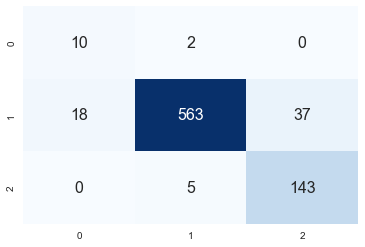

In [82]:
model_eval(knn_pred)

Classification Report: 
              precision    recall  f1-score   support

           0       0.17      1.00      0.29        12
           1       1.00      0.83      0.91       618
           2       0.76      0.99      0.86       148

    accuracy                           0.87       778
   macro avg       0.64      0.94      0.69       778
weighted avg       0.94      0.87      0.89       778

------------------------------------------------------------
Accuracy Score: 
0.8650385604113111
------------------------------------------------------------


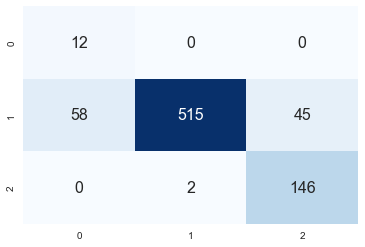

In [83]:
model_eval(gnb_pred)

## KNN is best performer and it has accuracy of ~93%

## Predictive Modeling Pipeline

Creating model based on `StandardScaler` and best performed model.

In [84]:
# Creating Pipeline 
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('StandardScaler', sc),
                ('KNN-tuned', knn_tuned)])
pipeline.fit(X_sm, y_sm)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('KNN-tuned',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])

### Evaluating pipeline

Classification Report: 
              precision    recall  f1-score   support

           0       0.37      0.92      0.52        12
           1       0.99      0.91      0.95       618
           2       0.80      0.96      0.87       148

    accuracy                           0.92       778
   macro avg       0.72      0.93      0.78       778
weighted avg       0.94      0.92      0.93       778

------------------------------------------------------------
Accuracy Score: 
0.9215938303341902
------------------------------------------------------------


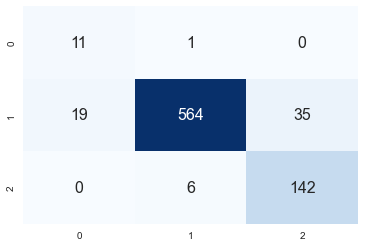

In [85]:
y_pred = pipeline.predict(X_test)

# Evaluating pipeline
model_eval(y_pred)

### Saving the pipeline

In [87]:
import pickle
file1 = 'ML model/final_pipeline.pkl'
pickle.dump(pipeline,open('ML model/final_pipeline.pkl','wb'))

## End of the script